In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
amazon_data = ('amazon_cells_labelled.txt')
yelp_data = ('yelp_labelled.txt')
imdb_data = ('imdb_labelled.txt')

df = pd.read_table(amazon_data, header = None)
# Positive Review => 1
# Negative Review => 0
df.columns = ['Reviews', 'Rating']

In [3]:
# Do not run a second time
# Wants to find negative reviews
df['Rating'] = (df['Rating'] == 0)
df.head()

,Reviews,Rating
0,So there is no way for me to plug it in here i...,True
1,"Good case, Excellent value.",False
2,Great for the jawbone.,False
3,Tied to charger for conversations lasting more...,True
4,The mic is great.,False


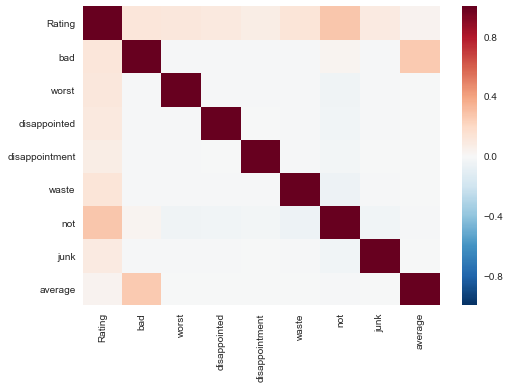

In [4]:
# some keywords only works better for certain data
## 'junk' -> better for amazon data
negative_key = ['bad', 'worst', 'disappointed', 'disappointment', 'wasted', 'waste', 'do not', 'not', 'junk', 'average']

#Find these keywords that represent negative reviews
for key in negative_key:
    df[str(key)] = df.Reviews.str.contains('' + str(key) + '', case = False)
    
## DO NOT run a second time!!

# combine the varibles that are highly correlated
# 'do not' + 'not' 
df.loc[((df['do not'] == True) | (df['not'] == True) ), 'not'] = True
df = df.drop(['do not'], axis = 1)

# 'wasted' + 'waste'
df.loc[((df['wasted'] == True) | (df['waste'] == True)), 'waste'] = True
df = df.drop(['wasted'], axis = 1)

# 'bad' + 'average' 
#df.loc[((df['bad'] == True) | (df['average'] == True) ), 'bad'] = True
#df = df.drop(['average'], axis = 1)


# remove the unwanted variables from list
negative_key.remove('do not')
negative_key.remove('wasted')
#negative_key.remove('average')

# after combining the two highly correlated variableds
sns.heatmap(df.corr())

In [9]:
# set targeted variables and features
features = df[negative_key]
target = df['Rating']

In [10]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Classify, storing the result in a new variable.
y_pred = bnb.fit(features, target).predict(features)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    features.shape[0],
    (target != y_pred).sum()
))
print('The mislabeled points proportion : {0:.4f}'.format(
    (target != y_pred).sum() / 
    features.shape[0]))

Number of mislabeled points out of a total 1000 points : 344
The mislabeled points proportion : 0.3440


# Holdout Group


In [17]:
per_90 = int(len(features) * 0.9)

rows = list(np.random.choice(features.index, per_90, replace = False))
rows = pd.to_numeric(rows).astype(int)

features_90 = features.loc[rows]       #training set
target_90 = target.loc[rows]

features_10 = features.drop(features.index[rows])     #testing set
target_10 = target.drop(target.index[rows])

In [20]:
# training set
bnb = BernoulliNB()
y_pred_90 = bnb.fit(features_90, target_90).predict(features_90)
print('accuracy rate for features_90: {0:.4f}'.format(
     ( 1 - (y_pred_90 != target_90).sum() / 
      target_90.shape[0])))

# testing set
# run with features_10, in theory should be lower than the result from features_90
bnb = BernoulliNB()
y_pred_10 = bnb.fit(features_10, target_10).predict(features_10)
print('accuracy rate  for features_10: {0:.4f}'.format(
     ( 1 - (y_pred_10 != target_10).sum() / 
      target_10.shape[0])))

accuracy rate for features_90: 0.6633
accuracy rate  for features_10: 0.5900


# Cross Validation

In [21]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)

In [25]:
for train, test in skf.split(features, target):    
    features_train = features.loc[train]       #training set
    target_train = target.loc[train]
    
    features_test = features.drop(features.index[train])       #testing set
    target_test = target.drop(target.index[train])
    
    bnb = BernoulliNB()
    y_pred_train = bnb.fit(features_train, target_train).predict(features_train)
    print('accuracy rate (training set): {0: .4f}' .format(
         ( 1 - (y_pred_train != target_train).sum() / 
         target_train.shape[0])))
    
    y_pred_test = bnb.fit(features_test, target_test).predict(features_test)
    print('accuracy rate (testing set): {0: .4f}' .format(
         ( 1 - (y_pred_test != target_test).sum() /
         target_test.shape[0])))
    print('\n')

accuracy rate (training set):  0.6471
accuracy rate (testing set):  0.6737


accuracy rate (training set):  0.6607
accuracy rate (testing set):  0.6467


accuracy rate (training set):  0.6602
accuracy rate (testing set):  0.6476


